# Understanding the Business

## About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="darkgrid")
pd.set_option('display.max_columns', 50) 

In [3]:
train_df = pd.read_csv('train_ctrUa4K.csv')

# Understanding the data

In [4]:
print('No of records in training data :', train_df.shape)

No of records in training data : (614, 13)


In [5]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
display(train_df.describe([0.5,0.75,0.95,0.99,0.995,0.998]))

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000
99.5%,39943.620000,19434.500000,600.000000,480.00000,1.000000
99.8%,60721.276000,30709.838000,640.900000,480.00000,1.000000


In [ ]:
train_df = train_df.loc[train_df[col] <= HV_quantile[col]]

In [ ]:
round(train_df.isnull().sum(axis=0)/len(train_df)*100,2) # Pecentage of NaN per column in train set

**Catgorical features**
- Gender
- Married
- Dependants
- Education
- Self_Employed
- Credit_History
- Property_Area

**Numerical features**
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term??

### EDA - Univariate Analysis

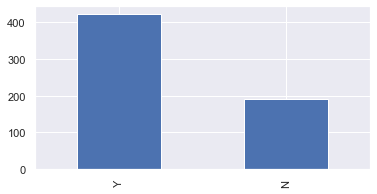

In [8]:
plt.figure(figsize=(6, 3))  
train_df.Loan_Status.value_counts().plot.bar();

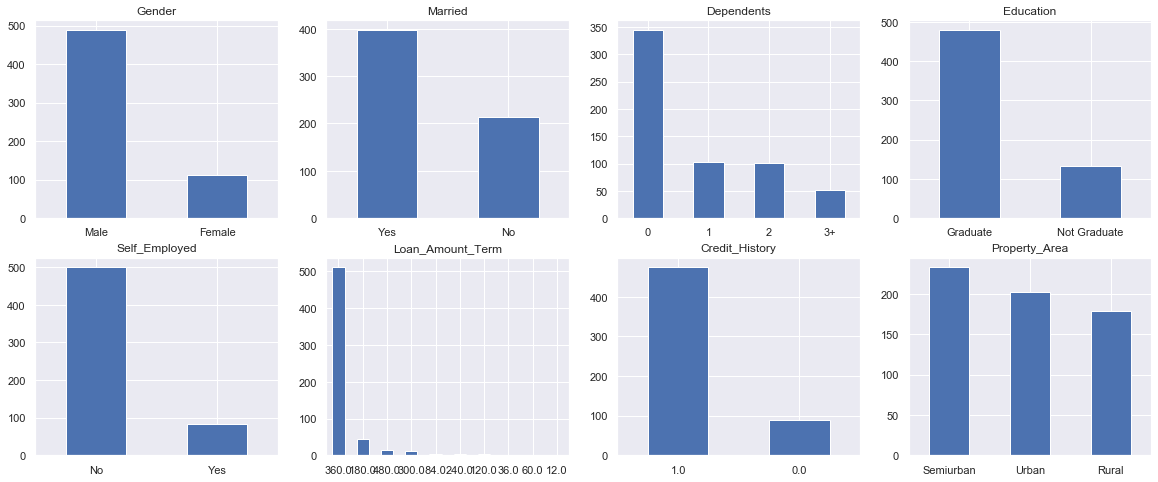

In [9]:
Cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

plt.figure(figsize=(20, 8))  
for i in range(0,2):
    for j in range(0,4):
        idx = (i*4)+j
        if(idx <=7):
            plt.subplot(2,4, idx+1)
            train_df[Cat_cols[idx]].value_counts().plot(kind='bar', title= Cat_cols[idx], rot=0)
plt.show()


In [10]:
def plot_univariate_continous(df, col):
    plt.figure(figsize=(10, 3))
    ax1 = plt.subplot(1, 2, 1)
    sns.distplot(df[col].dropna())
    ax2 = plt.subplot(1, 2, 2)
    sns.boxenplot(df[col].dropna())
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


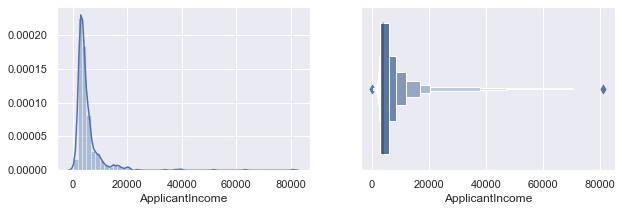

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


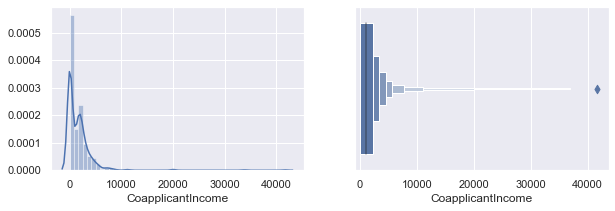

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


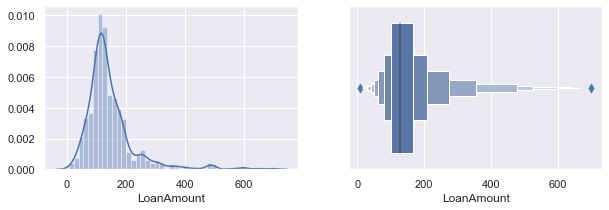

In [11]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

for col in num_cols:
    plot_univariate_continous(train_df, col)


### EDA - Bivariate Analysis

In [ ]:
sns.heatmap(train_df[num_cols].corr(), annot=True)
plt.show()

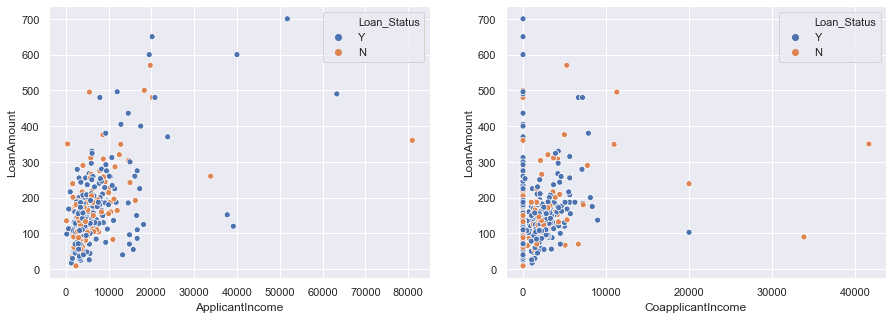

In [12]:
#sns.regplot(x="ApplicantIncome", y="LoanAmount", data=train_df)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=train_df,hue='Loan_Status')
plt.subplot(1,2,2)
sns.scatterplot(x="CoapplicantIncome", y="LoanAmount", data=train_df,hue='Loan_Status')
plt.show()

#fig, axes = plt.subplots(2, 4, figsize =(20,6), sharey = True)
plt.figure(figsize=(20, 8))  
for i in range(0,2):
    for j in range(0,4):
        idx = (i*4)+j
        if(idx <=7):
            plt.subplot(2,4, idx+1)
            pd.crosstab(train_df[Cat_cols[idx]], train_df.Loan_Status, dropna=False, normalize='index').plot.bar(stacked=True, rot=0)
plt.show()

In [ ]:
#for col in Cat_cols:
    #print(, '\n')

In [ ]:
#for col in num_cols:
  # g = sns.boxplot(y=train_df[col].dropna(), x=train_df['Loan_Status'])
   #g.set_yscale("log")
  # plt.show()

### Feature Engineering

In [ ]:
# impute categorical columns with Mode and numerical values with mean

In [ ]:
train_df['Gender'].fillna( train_df['Gender'].dropna().mode().values[0], inplace=True)
train_df['Married'].fillna( train_df['Married'].dropna().mode().values[0], inplace=True)
train_df['Dependents'].fillna( train_df['Dependents'].dropna().mode().values[0], inplace=True)
train_df['Self_Employed'].fillna( train_df['Self_Employed'].dropna().mode().values[0], inplace=True)
train_df['Loan_Amount_Term'].fillna( train_df['Loan_Amount_Term'].dropna().mode().values[0], inplace=True)
train_df['Credit_History'].fillna( train_df['Credit_History'].dropna().mode().values[0], inplace=True)

In [ ]:
display(train_df['Dependents'].value_counts())
display(train_df['Gender'].value_counts())
display(train_df['Married'].value_counts())
display(train_df['Education'].value_counts())
display(train_df['Self_Employed'].value_counts())
display(train_df['Loan_Status'].value_counts())

In [ ]:
train_df['Dependents'] = train_df['Dependents'].str.rstrip('+').astype(np.int) # to replace 3+ with 3
train_df['Gender'] = train_df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
train_df['Married'] = train_df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train_df['Education'] = train_df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train_df['Self_Employed'] = train_df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)


In [ ]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna( train_df['LoanAmount'].dropna().mean() )

In [ ]:
train_df.info()

In [ ]:
train_df.drop(['Loan_ID'], axis=1, inplace=True)

### Deriving new features

In [ ]:
train_df['LoanAmount'] = train_df['LoanAmount'] *  1000
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
Monthly_intrate = 1 # equal to 12% Anual interest rate
p = train_df['LoanAmount']
R = 8 ## Anual rate
r = R /(12*100)
n = train_df['Loan_Amount_Term']
train_df['EMI']= (p*r* np.power(1+r, n))/(np.power(1+r, n)-1)

#train_df['EMI'] = train_df['LoanAmount']/ train_df['Loan_Amount_Term']
#train_df['BalanceIncome'] =  train_df['EMI'] / train_df['TotalIncome']

In [ ]:
#train_df['BalanceIncome'] =  train_df['EMI'] / train_df['TotalIncome']
train_df['BalanceIncome'] =  train_df['TotalIncome']-train_df['EMI'] 

In [ ]:
train_df[['LoanAmount','EMI','TotalIncome','BalanceIncome']].head(10)

In [ ]:
train_df.describe()

In [ ]:
train_df.head(5)

In [ ]:
derive_col = ['TotalIncome','EMI','BalanceIncome']

for col in derive_col:
    plot_univariate_continous(train_df, col)

In [ ]:
#sns.boxplot(x=train_df.Loan_Status, y=train_df.BalanceIncome)

def apply_transformation(transform_type):
    if(transform_type == 'log'):


        train_df['log_TotalIncome'] = np.log(train_df['TotalIncome'])
        #train_df['log_ApplicantIncome'] = np.log(train_df['ApplicantIncome']+1)
       # train_df['log_CoapplicantIncome'] = np.log(train_df['CoapplicantIncome']+1)
        train_df['log_LoanAmount'] = np.log(train_df['LoanAmount'])
        train_df['log_EMI'] = np.log(train_df['EMI'])
        train_df['log_BalanceIncome'] = np.log(train_df['BalanceIncome'])

In [ ]:
train_df.drop(columns=['ApplicantIncome', 'CoapplicantIncome','TotalIncome'], inplace=True)

#plt.figure(figsize=(6,6))
sns.heatmap(train_df[['EMI','BalanceIncome']].corr(), annot=True)
plt.show()

In [ ]:
#train_df.drop(['TotalIncome', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'EMI', 'BalanceIncome', 'Loan_Amount_Term' ], axis=1, inplace=True)



In [ ]:
train_df.describe()

In [ ]:
dummy_df = train_df[['Dependents','Property_Area','Loan_Amount_Term']]
dummy_df = pd.get_dummies(data=dummy_df,columns=dummy_df.columns,drop_first=True)
#dummy_df = pd.get_dummies(train_df)
dummy_df.head()

In [ ]:
train_df.drop(columns=['Dependents','Property_Area','Loan_Amount_Term'],inplace=True)
train_df = pd.concat([train_df,dummy_df],axis=1)
train_df.shape

In [ ]:
train_df.describe()

In [ ]:
X = train_df.drop(['Loan_Status'], axis=1)
y = train_df.Loan_Status

In [ ]:
#SS = StandardScaler() # Use standard scaler for scaling continous features
#train_columns = train_df.columns
#train_df_ss = pd.DataFrame(SS.fit_transform(train_df),columns=train_columns)
#train_df_ss.describe()

X_cat_cols = ['Gender','Married','Education','Self_Employed','Credit_History'] + list(dummy_df.columns.values)
X_num_cols = X.drop(X_cat_cols,axis=1).columns.tolist()

SS = StandardScaler() # Use standard scaler for scaling continous features
X = pd.concat([X[X_cat_cols],pd.DataFrame(SS.fit_transform(X.drop(X_cat_cols, axis=1)))], axis=1)

X.columns = X_cat_cols+X_num_cols

In [ ]:
display(round(X.describe(),2))

## Model Preparation

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
#from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### XGBoost 

In [ ]:

# hyperparameter tuning with XGBoost

# specify range of hyperparameters
param_grid = { 
              'learning_rate':[0.0001,0.001,0.01],
              #'max_depth': range(3,11,1),
              'max_depth': [3,4],
              #'n_estimators':range(100,1300,100),
              'n_estimators': range(100,400,100)
              #'subsample' : [0.7, 0.8, 1.0]
              #'gamma': [0,0.1,0.2,0.3,0.4],
              #'gamma': [0],
              # 'reg_alpha':[0.01,0.1,1,10],
              #'reg_lambda':[0.01,0.1,1,10],   
            #   'scale_pos_weight': [0.25] 
             #   'scale_pos_weight': ['balanced']
             }

# specify model
folds = folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring = ['accuracy', 'recall', 'precision']
xgb = XGBClassifier(random_state=42)

# set up GridSearchCV()
model_cv_xgb = GridSearchCV(estimator = xgb,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit = 'accuracy',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True) 

model_cv_xgb.fit(X, y)
cv_result_xgb =pd.DataFrame(model_cv_xgb.cv_results_)
display(cv_result_xgb)


In [ ]:
print('Best score : ', model_cv_xgb.best_score_, 'is obtained with ', model_cv_xgb.best_params_)
model_xgb = model_cv_xgb.best_estimator_
#print("\n Best Estimator:",model_xgb)
model_xgb.fit(X, y)

In [ ]:
features = X.columns.tolist()
importance = model_xgb.feature_importances_
rf_coefs = pd.Series(importance,index=features)

plt.figure(figsize=(10,6))
rf_coefs[(rf_coefs>0.005)].sort_values().plot.barh()
plt.show()

### Random Forest

In [ ]:
# hyperparameter tuning with Random Forest

# specify range of hyperparameters
param_grid = {
    
      'max_depth': [ 3, 4, 5],
     # 'max_depth': [10],
    # 'min_samples_leaf': range(50,200 ,50),
     'min_samples_split': [100, 150, 200],     
    # 'class_weight' : ['balanced', {0:1, 1:16}] ,           
     'class_weight' : [  None]  ,
    # 'n_estimators': range(100,300,100)
     'n_estimators': [100, 200]
   
}

# specify model
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring = ['accuracy', 'recall', 'precision']
rf2 = RandomForestClassifier( random_state=42,oob_score=True)

# set up GridSearchCV()

model_cv_rf2 = GridSearchCV(estimator = rf2,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit='accuracy',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True)                         
                
model_cv_rf2.fit(X, y)
cv_result_rf2 =pd.DataFrame(model_cv_rf2.cv_results_)
display(cv_result_rf2)

In [ ]:
print('Best score : ', model_cv_rf2.best_score_, 'is obtained with ', model_cv_rf2.best_params_)
model_rf = model_cv_rf2.best_estimator_
#print("\n Best Estimator:",model_xgb)
model_rf.fit(X, y)

In [ ]:
features = X.columns.tolist()
importance = model_rf.feature_importances_
rf_coefs = pd.Series(importance,index=features)

plt.figure(figsize=(10,6))
rf_coefs[(rf_coefs>0.005)].sort_values().plot.barh()
plt.show()

### ADA Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# hyperparameter tuning with Random Forest

# specify range of hyperparameters
param_grid = {
    
     'learning_rate': [0.0001, 0.001, .01, .1],
     'n_estimators': [ 20, 50]
   
}


folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

scoring = ['accuracy', 'recall', 'precision']
rus_bc = AdaBoostClassifier(algorithm='SAMME.R', random_state=42)

# set up GridSearchCV()

model_cv_rus_bc = GridSearchCV(estimator = rus_bc,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit='accuracy',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True)                         
                
model_cv_rus_bc.fit(X, y)
cv_result_rus =pd.DataFrame(model_cv_rus_bc.cv_results_)
display(cv_result_rus)

In [ ]:
print('Best score : ', model_cv_rus_bc.best_score_, 'is obtained with ', model_cv_rus_bc.best_params_)
model_rus = model_cv_rus_bc.best_estimator_
#print("\n Best Estimator:",model_xgb)
model_rus.fit(X, y)

In [ ]:
features = X.columns.tolist()
importance = model_rf.feature_importances_
rf_coefs = pd.Series(importance,index=features)

plt.figure(figsize=(10,6))
rf_coefs[(rf_coefs>0.005)].sort_values().plot.barh()
plt.show()

### Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
# hyperparameter tuning with Random Forest

param_grid = {
    'penalty' : [  'l2', 'none']
}

folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

scoring = ['accuracy', 'recall', 'precision']
lr = LogisticRegression(random_state=42)

# set up GridSearchCV()

model_cv_lr = GridSearchCV(lr,
                        scoring= scoring, 
                        param_grid = param_grid, 
                        refit='accuracy',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True)                         
                
model_cv_lr.fit(X, y)
cv_result_lr =pd.DataFrame(model_cv_lr.cv_results_)
display(cv_result_lr)

In [ ]:
print('Best score : ', model_cv_lr.best_score_, 'is obtained with ', model_cv_lr.best_params_)
model_lr = model_cv_lr.best_estimator_
#print("\n Best Estimator:",model_xgb)
model_lr.fit(X, y)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99,random_state=42)
X_reduced = pca.fit_transform(X)
#Xtest_reduced = pca.transform(X_test)
print(' No of components after PCA :', pca.n_components_)

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_).round(4))
#plt.vlines(x=52,ymin=0,ymax=1.05,color='r',linestyles='dashed')
#plt.vlines(x=66,ymin=0,ymax=1.05,color='r',linestyles='dashed')
#plt.hlines(y=0.95,xmin=0,xmax=80,color='g',linestyles='dashed')
#plt.hlines(y=0.98,xmin=0,xmax=80,color='g',linestyles='dashed')
plt.show()

# SVM

In [ ]:
# hyperparameter tuning with Random Forest

# specify range of hyperparameters
param_grid = { #'C': [1,10,100,1000],             
              'C': range(1,25,1),  
              # 'C': [2],
              'gamma': [0.00001,0.0001,0.001,0.01,0.1,1],#,'scale', 'auto'], 
              # 'gamma': [0.001], 
              #'kernel': ['linear','rbf','poly','sigmoid'],
              'kernel': ['rbf'],
              #'class_weight': [{0:1, 1:0.5}]
                'class_weight': ['balanced']
              
}

# specify model
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring = ['accuracy', 'recall', 'precision']
svc = SVC(random_state=42)

# set up GridSearchCV()

model_cv_svc = GridSearchCV(estimator = svc,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit='accuracy',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True)                         
                
model_cv_svc.fit(X, y)
cv_result_svc =pd.DataFrame(model_cv_svc.cv_results_)
#display(cv_result_svc.sort_values(by='rank_test_accuracy'))

In [ ]:
print('Best score : ', round(model_cv_svc.best_score_,3), 'is obtained with ', model_cv_svc.best_params_)
model_svc = model_cv_svc.best_estimator_
#print("\n Best Estimator:",model_xgb)
model_svc.fit(X, y)

In [ ]:
cv_result_svc['param_C'] = cv_result_svc['param_C']#.astype('int')
gamma= [0.0001,0.001,0.01,0.1,1]
col_count = len(gamma)
plt_count = 0

if col_count > 5:
    row_count=2
else:
    row_count=1

plt.figure(figsize=(20,5*row_count))
for g in gamma:
    plt_count+=1
    plt.subplot(row_count,col_count,plt_count)
    gamma_df = cv_result_svc[cv_result_svc['param_gamma']==g]

    plt.plot(gamma_df["param_C"], gamma_df["mean_test_accuracy"])
    plt.plot(gamma_df["param_C"], gamma_df["mean_train_accuracy"])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    title="Gamma="+str(g)
    plt.title(title)
    plt.ylim([0.60, 1])
    plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
    #£plt.xscale('log')

plt.show()

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_result_svc['param_C'] = cv_result_svc['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_result_svc[cv_result_svc['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_accuracy"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_result_svc[cv_result_svc['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_accuracy"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_result_svc[cv_result_svc['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_accuracy"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

### Prediction on Test set

In [ ]:
test_df = pd.read_csv('test_lAUu6dG.csv')

In [ ]:
test_df_copy = test_df.copy()

In [ ]:
# impute categorical columns with Mode and numerical values with mean

In [ ]:
test_df['Gender'].fillna( test_df['Gender'].dropna().mode().values[0], inplace=True)
test_df['Married'].fillna( test_df['Married'].dropna().mode().values[0], inplace=True)
test_df['Dependents'].fillna( test_df['Dependents'].dropna().mode().values[0], inplace=True)
test_df['Self_Employed'].fillna( test_df['Self_Employed'].dropna().mode().values[0], inplace=True)
test_df['Loan_Amount_Term'].fillna( test_df['Loan_Amount_Term'].dropna().mode().values[0], inplace=True)
test_df['Credit_History'].fillna( test_df['Credit_History'].dropna().mode().values[0], inplace=True)

In [ ]:
test_df['Dependents'] = test_df['Dependents'].str.rstrip('+').astype(np.int) # to replace 3+ with 3

test_df['Gender'] = test_df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
test_df['Married'] = test_df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
test_df['Education'] = test_df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
test_df['Self_Employed'] = test_df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)


In [ ]:
test_df['LoanAmount'] = test_df['LoanAmount'].fillna( test_df['LoanAmount'].dropna().mean() )

In [ ]:
test_df.drop(['Loan_ID'], axis=1, inplace=True)

In [ ]:
test_df['LoanAmount'] = test_df['LoanAmount'] *  1000
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

p = test_df['LoanAmount']
n = test_df['Loan_Amount_Term']
test_df['EMI']= (p*r* np.power(1+r, n))/(np.power(1+r, n)-1)

#train_df['EMI'] = train_df['LoanAmount']/ train_df['Loan_Amount_Term']
test_df['BalanceIncome'] = (test_df['EMI'])/test_df['TotalIncome'] 

In [ ]:
test_df['log_TotalIncome'] = np.log(test_df['TotalIncome'])
#test_df['log_ApplicantIncome'] = np.log(test_df['ApplicantIncome']+1)
#test_df['log_CoapplicantIncome'] = np.log(test_df['CoapplicantIncome']+1)
test_df['log_LoanAmount'] = np.log(test_df['LoanAmount'])
test_df['log_EMI'] = np.log(test_df['EMI'])
test_df['log_BalanceIncome'] = np.log(test_df['BalanceIncome'])

In [ ]:
#test_df.drop(['TotalIncome', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'EMI', 'BalanceIncome', 'Loan_Amount_Term'], axis=1, inplace=True)

In [ ]:
test_df = pd.get_dummies(test_df) 

In [ ]:
X_test = test_df

In [ ]:
X_test.describe()

In [ ]:
test_df_copy['Loan_Status_xgb'] = model_xgb.predict(X_test)
test_df_copy['Loan_Status_rf'] = model_rf.predict(X_test)
test_df_copy['Loan_Status_ada'] = model_rus.predict(X_test)

#test_df_copy['Loan_Status'] = test_df_copy['Loan_Status_xgb'] + test_df_copy['Loan_Status_rf'] + test_df_copy['Loan_Status_ada']
#test_df_copy['Loan_Status'] = test_df_copy['Loan_Status'].map({0:'N', 1:'N', 2:'Y', 3:'Y'})

#test_df_copy['Loan_Status'] = model_lr.predict(X_test)
test_df_copy['Loan_Status'] = model_rf.predict(X_test)
test_df_copy['Loan_Status'] = test_df_copy['Loan_Status'].map({0:'N', 1:'Y'})

In [ ]:
test_df_copy[[ 'Loan_ID', 'Loan_Status']].to_csv('prediction.csv',index=False)